<a href="https://colab.research.google.com/github/michinsaramiya/RentalBiz-ML-/blob/main/Copy_of_capstone_prototypre_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [ ]:
# Load the data
from google.colab import files
uploaded = files.upload()

Saving OnlineRetailfix.csv to OnlineRetailfix.csv


In [ ]:
df = pd.read_csv(next(iter(uploaded.keys())), encoding='latin-1')


In [ ]:
# Dataset information
print("There are {} rows and {} columns".format(df.shape[0],df.shape[1]))
print("\n====================================================")
print("Missing Values:\n", df.isnull().sum())
print("\n====================================================")
print("Categories Counts:\n", df['Category'].value_counts())

There are 1106 rows and 7 columns

Missing Values:
 InvoiceNo         0
Description       0
UnitPrice         0
CustomerID        0
Country           0
Category          0
Unnamed: 6     1106
dtype: int64

Categories Counts:
 Hobi            324
Dapur           193
Cafe            169
Baju            143
Elektronik      115
Travel          102
Musik            20
Transportasi     20
Kamera           20
Name: Category, dtype: int64


In [ ]:
# Split the dataset into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(df['Description'], df['Category'], test_size=0.2, random_state=42)

In [ ]:
# Preprocessing the text
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

In [ ]:
word_index = tokenizer.word_index
print(len(word_index))
print(word_index)

987
{'<OOV>': 1, 'set': 2, 'red': 3, 'of': 4, 'heart': 5, 'retrospot': 6, 'white': 7, 'christmas': 8, 'bag': 9, 't': 10, 'vintage': 11, 'warmer': 12, 'water': 13, 'bottle': 14, 'hand': 15, 'hot': 16, 'design': 17, 'light': 18, 'cake': 19, 'pack': 20, 'holder': 21, 'pink': 22, 'box': 23, 'black': 24, 'blue': 25, 'small': 26, '6': 27, '3': 28, 'cases': 29, 'metal': 30, 'polkadot': 31, 'mug': 32, 'tea': 33, 'with': 34, 'kit': 35, 'jumbo': 36, 'lights': 37, '2': 38, 'union': 39, 'jam': 40, 'in': 41, 'paper': 42, 'coffee': 43, 'hanging': 44, 'lunch': 45, 'wooden': 46, 'glass': 47, 'feltcraft': 48, 'jack': 49, 'bird': 50, 'assorted': 51, 'kitchen': 52, 'silver': 53, 'paisley': 54, 'and': 55, 'clock': 56, 'love': 57, 'sign': 58, 'making': 59, '60': 60, 'fairy': 61, 'cream': 62, 'boxes': 63, 'tin': 64, 'frame': 65, 'card': 66, 'ribbons': 67, '12': 68, 'star': 69, 'babushka': 70, 'wood': 71, 'spaceboy': 72, 'edwardian': 73, 'cosy': 74, 'party': 75, 'candles': 76, 'magic': 77, 'wicker': 78, 'cha

In [ ]:
# Generate and pad the training sequences
sequences = tokenizer.texts_to_sequences(X_train)
maxlen = max([len(x) for x in sequences])
padded = pad_sequences(sequences, maxlen=maxlen, padding='post')

In [ ]:
# Generate and pad the test sequences
test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(test_sequences, maxlen=maxlen, padding='post')

In [ ]:
# Convert training labels to numeric
y_train_final = []
for i in Y_train:
    if i == 'Dapur':
        y_train_final.append(0)
    elif i == 'Cafe':
        y_train_final.append(1)
    elif i == 'Hobi':
        y_train_final.append(2)
    elif i == 'Elektronik':
        y_train_final.append(3)
    elif i == 'Travel':
        y_train_final.append(4)
    elif i == 'Baju':
        y_train_final.append(5)
    elif i == 'Musik':
        y_train_final.append(6)
    elif i == 'Transportasi':
        y_train_final.append(7)
    elif i == 'Kamera':
        y_train_final.append(8)
y_train_final = np.array(y_train_final)

In [ ]:
# Convert testing labels to numeric
y_test_final = []
for i in Y_test:
    if i == 'Dapur':
        y_test_final.append(0)
    elif i == 'Cafe':
        y_test_final.append(1)
    elif i == 'Hobi':
        y_test_final.append(2)
    elif i == 'Elektronik':
        y_test_final.append(3)
    elif i == 'Travel':
        y_test_final.append(4)
    elif i == 'Baju':
        y_test_final.append(5)
    elif i == 'Musik':
        y_test_final.append(6)
    elif i == 'Transportasi':
        y_test_final.append(7)
    elif i == 'Kamera':
        y_test_final.append(8)
y_test_final = np.array(y_test_final)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=maxlen),
    tf.keras.layers.Conv1D(32, 3, activation='relu'),
    tf.keras.layers.Bidirectional(LSTM(32, dropout=0.2, recurrent_dropout=0.2)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(9, activation='softmax')
])

# Compile the model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    metrics='accuracy')

ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,
                                     min_lr = 0.01,
                                     monitor = 'val_loss',
                                     verbose = 1)

# Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 21, 100)           98800     
                                                                 
 conv1d (Conv1D)             (None, 19, 32)            9632      
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 512)               33280     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                        

In [ ]:
# Train the model
history = model.fit(padded, y_train_final, validation_data=(test_padded, y_test_final), epochs=1000)

Epoch 1/1000
28/28 [==============================] - 2s 69ms/step - loss: 0.2106 - accuracy: 0.8903 - val_loss: 5.0494 - val_accuracy: 0.6306
Epoch 2/1000
28/28 [==============================] - 2s 65ms/step - loss: 0.2082 - accuracy: 0.8903 - val_loss: 5.2290 - val_accuracy: 0.6261
Epoch 3/1000
28/28 [==============================] - 2s 67ms/step - loss: 0.2087 - accuracy: 0.8846 - val_loss: 5.1458 - val_accuracy: 0.6171
Epoch 4/1000
28/28 [==============================] - 2s 67ms/step - loss: 0.2063 - accuracy: 0.8869 - val_loss: 4.9085 - val_accuracy: 0.6171
Epoch 5/1000
28/28 [==============================] - 2s 64ms/step - loss: 0.2119 - accuracy: 0.8778 - val_loss: 4.9824 - val_accuracy: 0.6216
Epoch 6/1000
28/28 [==============================] - 3s 108ms/step - loss: 0.2119 - accuracy: 0.8903 - val_loss: 5.0667 - val_accuracy: 0.6441
Epoch 7/1000
28/28 [==============================] - 2s 64ms/step - loss: 0.2051 - accuracy: 0.8846 - val_loss: 5.1546 - val_accuracy: 0.635

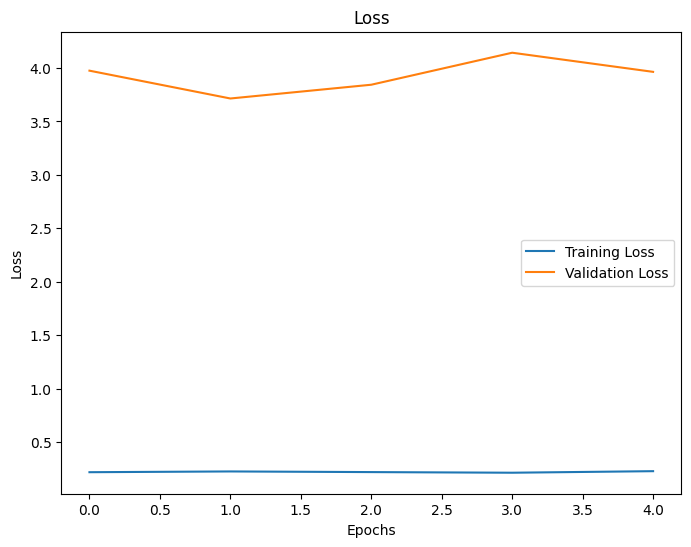

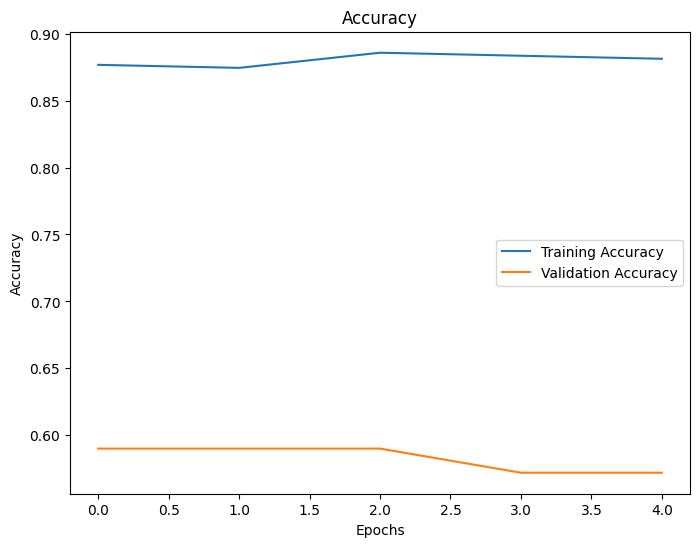

In [ ]:
import matplotlib.pyplot as plt

# Mendapatkan loss dan akurasi pada data latih dan data uji
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Menghasilkan plot untuk loss
plt.figure(figsize=(8, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Menghasilkan plot untuk akurasi
plt.figure(figsize=(8, 6))
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
# Melakukan prediksi pada data test
prediksi = model.predict(test_padded)

# Mengkonversi hasil prediksi menjadi label kategori
label_prediksi = np.argmax(prediksi, axis=1)

# Menampilkan hasil prediksi
for i in range(len(test_padded)):
    print(f"Data test ke-{i+1}: {test_padded[i]}")
    print(f"Prediksi: {label_prediksi[i]}")



7/7 [==============================] - 0s 11ms/step
Data test ke-1: [134  27   1 620   1 735   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0]
Prediksi: 1
Data test ke-2: [238  53 295  10  18 296   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0]
Prediksi: 2
Data test ke-3: [ 11 118  57 294  32   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0]
Prediksi: 1
Data test ke-4: [100 175 162  23   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0]
Prediksi: 2
Data test ke-5: [  1 249  22  39 307   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0]
Prediksi: 2
Data test ke-6: [ 15  12 173  84  17   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0]
Prediksi: 4
Data test ke-7: [1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Prediksi: 1
Data test ke-8: [36  9 22 31  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
Prediksi: 2
Data test ke-9: [723 459   8  86   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0

In [ ]:
# Melakukan evaluasi model pada data test
loss, accuracy = model.evaluate(test_padded, y_test_final)

# Menampilkan akurasi model
print("Akurasi pada data test: ", accuracy)

7/7 [==============================] - 0s 11ms/step - loss: 3.9634 - accuracy: 0.5721
Akurasi pada data test:  0.5720720887184143


In [ ]:
# Menggunakan metode "loc" untuk melakukan filtering berdasarkan kategori
kategori_tertentu = 5  # Ganti dengan kategori yang diinginkan
produk_kategori_tertentu = data_train.loc[data_train[5] == kategori_tertentu]

# Menampilkan semua data dengan kategori tertentu yang sudah ditraining
print(produk_kategori_tertentu)


KeyError: ignored